In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/taxi_trip_pricing.csv')

# Step 1: Data Preprocessing
data_cleaned = data.copy()

# Handle missing target values
data_cleaned = data_cleaned.dropna(subset=['Trip_Price'])

# Separate features and target
X = data_cleaned.drop(columns=['Trip_Price'])
y = data_cleaned['Trip_Price']

In [ ]:
# # Define numerical and categorical columns
# numerical_cols = X.select_dtypes(include=['float64']).columns
# categorical_cols = X.select_dtypes(include=['object']).columns

# Define numerical and categorical columns
numerical_cols = ['Trip_Distance_km','Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']
categorical_cols = ['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])



# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the dataset for inspection
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# # Print transformed datasets
# print("Transformed Training Data:")
# print(X_train_transformed)
# print("\nTransformed Testing Data:")
# print(X_test_transformed)

# Step 3: Training the Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_transformed, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Get the feature names for the transformed data
numerical_feature_names = numerical_cols
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine numerical and categorical feature names
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Create a DataFrame for the transformed training data
X_train_encoded_df = pd.DataFrame(X_train_transformed, columns=all_feature_names)

# Display the first few rows of the transformed DataFrame
print(X_train_encoded_df.head())





# Access the one-hot encoder from the preprocessor
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']

# Print the category order
print("Category order in OneHotEncoder:")
for feature, categories in zip(categorical_cols, onehot_encoder.categories_):
    print(f"{feature}: {categories}")





# Assuming `preprocessor` was used for training
one_hot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']

# Get the feature names from the encoder
one_hot_feature_names = one_hot_encoder.get_feature_names_out(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'])

print("One-hot feature names:", one_hot_feature_names)


   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0     -8.983912e-02        -0.421947  -0.283893     1.562063         0.317965   
1      6.688979e-01        -0.421947  -0.671028    -0.178519        -0.220819   
2      3.767401e-16         1.435648  -0.893924     0.595073         0.677155   
3      8.968902e-01         0.506851   1.205992     0.885170        -0.131022   
4      2.521493e-01        -0.421947  -0.471595     1.658762        -0.310617   

   Trip_Duration_Minutes  Time_of_Day_Afternoon  Time_of_Day_Evening  \
0               0.282236                    0.0                  0.0   
1               0.921292                    1.0                  0.0   
2              -0.593229                    0.0                  0.0   
3               1.633952                    1.0                  0.0   
4               0.981486                    0.0                  0.0   

   Time_of_Day_Morning  Time_of_Day_Night  Day_of_Week_Weekday  \
0             

In [ ]:
# Make predictions
y_pred = model.predict(X_test_transformed)

# Step 3: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 6.2684619547742635
Root Mean Squared Error (RMSE): 11.342624945343134
R^2 Score: 0.9449575149636378


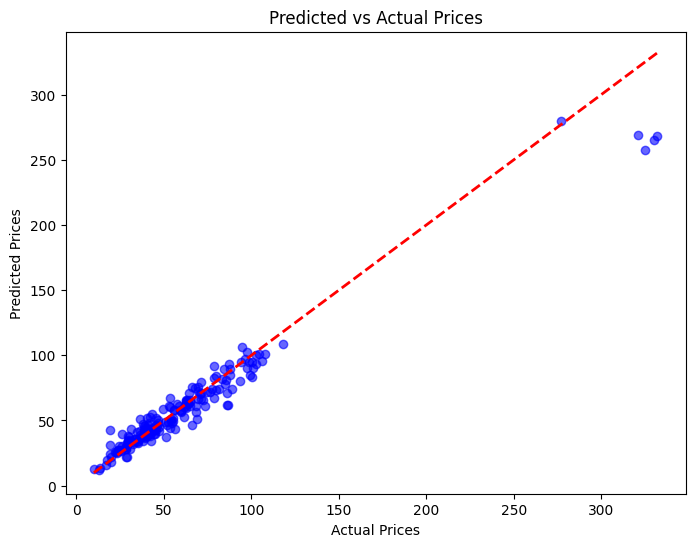

In [ ]:
# Step 4: Visualize Predictions vs Actual Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [ ]:
# Step 6: Predict on new data
def predict_new_data(new_data):
    """Predict trip prices for new data."""
    new_data = pd.DataFrame(new_data)
    new_data_transformed = preprocessor.transform(new_data)
    return model.predict(new_data_transformed)

# Example for new predictions
example_data = [{
    'Trip_Distance_km': 10,
    'Passenger_Count': 2,
    'Base_Fare': 3.5,
    'Per_Km_Rate': 0.8,
    'Per_Minute_Rate': 0.3,
    'Trip_Duration_Minutes': 20,
    'Time_of_Day': 'Morning',
    'Day_of_Week': 'Weekday',
    'Traffic_Conditions': 'Medium',
    'Weather': 'Clear'
}]



new_predictions = predict_new_data(example_data)

# Interpret and display predictions
for i, price in enumerate(new_predictions):
    print(f"Prediction {i + 1}: Estimated trip price is {price:.2f} USD.")


Prediction 1: Estimated trip price is 18.29 USD.
